<a href="https://www.kaggle.com/code/adityaramachandran27/diabetes-prediction-full-eda?scriptVersionId=131445118" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


<div style="text-align:center">
    <img src="https://www.niddk.nih.gov/-/media/Images/Health-Information/Diabetes/diabetes-monitor-fruits-vegetables-small_597x347.png" alt="Diabetes Monitoring" />
</div>

## Introduction

In this notebook, we would be doing Exploratory Data Analysis (EDA) on the dataset, which involves examining and understanding the data before applying any machine learning algorithms or making any predictions. EDA allows us to gain insights, detect patterns, and identify relationships within the dataset.

Our goal is to extract meaningful information from the data and uncover any interesting findings or trends that can guide our decision-making process. By plotting various graphs and visualizations, we can effectively explore the dataset and derive valuable insights.

Let's get started

## Summary of the dataset 
This dataset contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

## Summary of the columns

Certainly! Here's the summary of the columns with backticks (`) added for easy code integration:

- `gender`: Gender refers to the classification of individuals as male or female. It is an important demographic factor that can influence various aspects of health and medical conditions.

- `age`: Age represents the number of years a person has lived since birth. It provides insight into the individual's life stage, potential health risks, and susceptibility to certain diseases or conditions associated with specific age groups.

- `hypertension`: Hypertension, often referred to as high blood pressure, is a medical condition characterized by persistently elevated blood pressure in the arteries. It is a significant risk factor for various cardiovascular diseases and can lead to serious health complications if left unmanaged.

- `heart_disease`: Heart disease refers to a range of conditions affecting the heart, such as coronary artery disease, heart failure, or heart rhythm disorders. It is a broad term encompassing various cardiovascular disorders that can impact the overall functioning of the heart.

- `smoking_history`: Smoking history indicates whether an individual has a past or present habit of smoking tobacco products. Smoking is a well-known risk factor for numerous health problems, including respiratory diseases, cardiovascular diseases, and certain types of cancer.

- `bmi`: Body Mass Index (BMI) is a measure of body fat based on an individual's weight and height. It provides an estimation of whether a person's weight is within a healthy range or if they are underweight, overweight, or obese. BMI is commonly used as a screening tool for assessing the risk of weight-related health issues.

- `HbA1c_level`: HbA1c (Hemoglobin A1c) level is a laboratory test that measures the average blood sugar (glucose) levels over the past 2-3 months. It is commonly used in the diagnosis and management of diabetes. Higher HbA1c levels indicate poorer blood sugar control and may indicate the need for adjustments in diabetes treatment.

- `blood_glucose_level`: Blood glucose level refers to the concentration of glucose (sugar) in the bloodstream. It is an important indicator of an individual's blood sugar regulation. Abnormal blood glucose levels, either too high (hyperglycemia) or too low (hypoglycemia), can be associated with various health conditions, particularly diabetes.

- `diabetes`: Diabetes is a chronic medical condition characterized by elevated blood sugar levels due to insufficient insulin production or ineffective use of insulin in the body. It requires careful management and monitoring of blood sugar levels to prevent complications. Diabetes can have significant impacts on overall health and may require lifestyle modifications, medication, and regular medical care.

## Reading the dataset 

In [2]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.duplicated().sum()

3854

In [6]:
df.drop_duplicates(inplace=True)

## Preliminary analysis of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
for cols in df.columns:
    print('{} has {} null values'.format(cols, df[cols].isnull().sum()))

gender has 0 null values
age has 0 null values
hypertension has 0 null values
heart_disease has 0 null values
smoking_history has 0 null values
bmi has 0 null values
HbA1c_level has 0 null values
blood_glucose_level has 0 null values
diabetes has 0 null values


### Obervations from preliminary analysis:
- No null values in any of the columns
- Max values of  BMI and Blood Glucose Level look too high for now, we have to check for outliers later 

## Exploratory Data Analysis

## Segregating columns into types
- **Numerical** - age, bmi, HbA1c_level, blood_glucose_level
- **Categorical** - hypertension, heart_disease,diabetes, gender 

## Univariate Analysis 
- Univariate analysis focuses on analyzing each feature in the dataset independently.
- Distribution analysis:
    - The distribution of each feature is examined to identify its shape, central tendency, and dispersion.
- Identifying potential issues:
    - Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

### Univariate analysis on age 

In [10]:
import seaborn as sns
sns.color_palette('pastel')
import matplotlib.pyplot as plt

In [11]:
df.age.describe()

count    96146.000000
mean        41.794326
std         22.462948
min          0.080000
25%         24.000000
50%         43.000000
75%         59.000000
max         80.000000
Name: age, dtype: float64

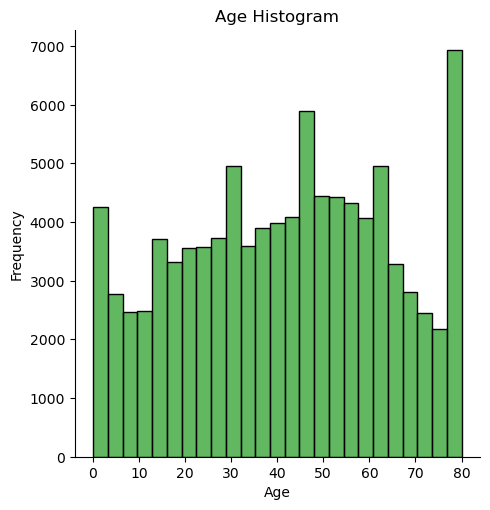

In [12]:
ax = sns.displot(data=df, x='age', kind='hist', color = sns.color_palette()[2], bins = 25)
ax.set(title='Age Histogram', xlabel='Age', ylabel='Frequency')

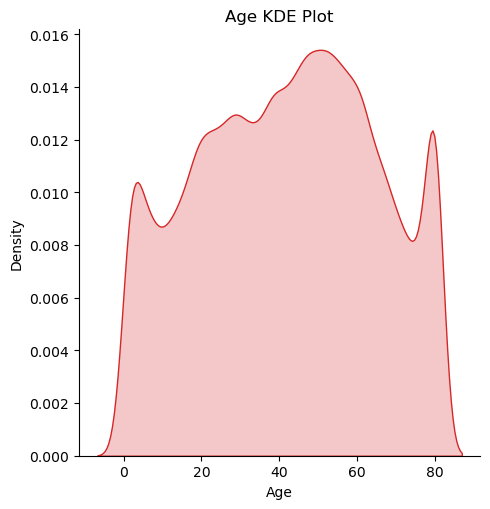

In [13]:
ax = sns.displot(data=df, x='age', kind='kde', color = sns.color_palette()[3], fill=True)
ax.set(title='Age KDE Plot', xlabel='Age')

In [14]:
df['age'].skew()

-0.062444736060842554

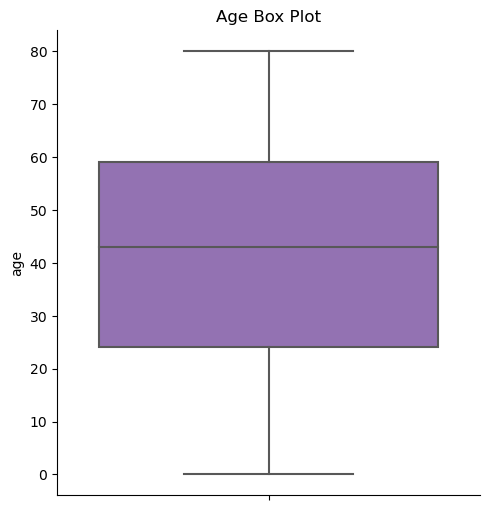

In [15]:
ax = sns.catplot(data=df, y='age', kind='box',color = sns.color_palette()[4])
ax.set(title='Age Box Plot')

#### Conclusions
- No missing values 
- No outliers
- Data is very slightly left skewed 

### Univariate analysis on bmi 

In [16]:
df['bmi'].describe()

count    96146.000000
mean        27.321461
std          6.767716
min         10.010000
25%         23.400000
50%         27.320000
75%         29.860000
max         95.690000
Name: bmi, dtype: float64

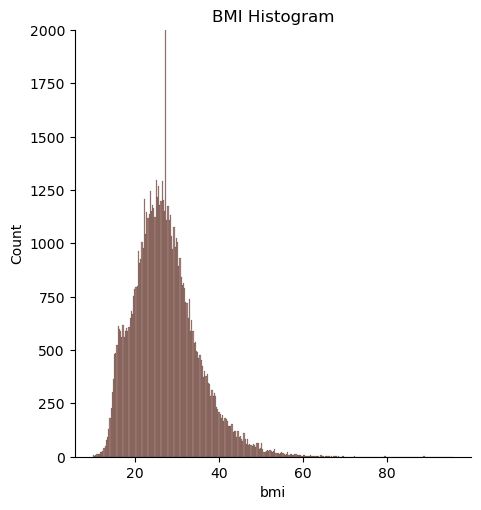

In [17]:
ax = sns.displot(data=df, x='bmi', color = sns.color_palette()[5])
plt.ylim((0, 2000))
ax.set(title='BMI Histogram')

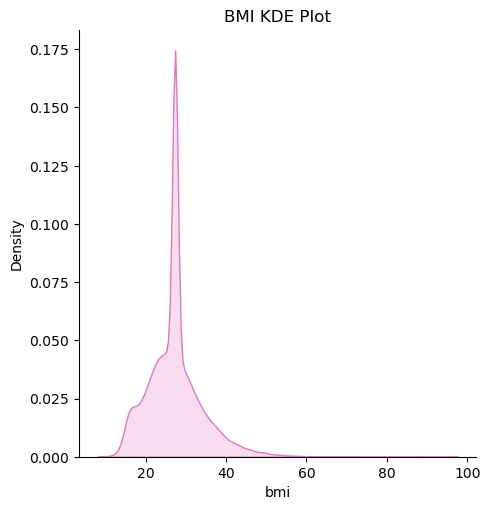

In [18]:
ax = sns.displot(data=df, x='bmi', color = sns.color_palette()[6], kind='kde', fill=True)
ax.set(title='BMI KDE Plot')

In [19]:
df.bmi.skew()

1.0237511657232292

In [20]:
df.bmi.value_counts()

27.32    21666
23.00      103
27.12      101
24.96      100
27.80      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: bmi, Length: 4247, dtype: int64

In [21]:
df.bmi.value_counts(normalize=True).head(10)*100

27.32    22.534479
23.00     0.107129
27.12     0.105049
24.96     0.104008
27.80     0.104008
22.40     0.102968
25.00     0.102968
25.60     0.101928
24.50     0.097768
26.70     0.097768
Name: bmi, dtype: float64

#### Hunting for outliers

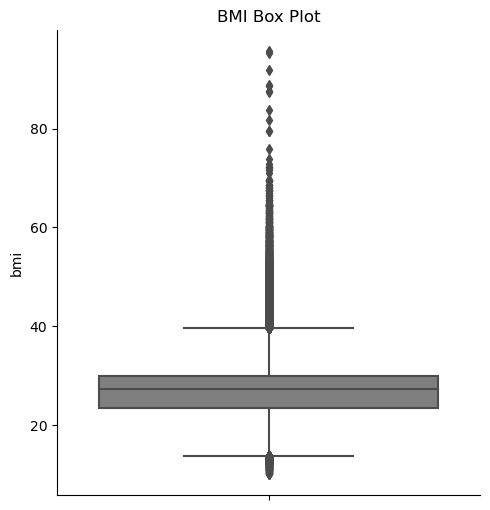

In [22]:
# Hunting for outliers

ax=sns.catplot(data=df, y='bmi', color=sns.color_palette()[7], kind='box')
ax.set(title='BMI Box Plot')

#### analyzing outliers

In [23]:
df.query('bmi > 40 or bmi < 15')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
11,Female,54.0,0,0,former,54.70,6.0,100,0
24,Female,4.0,0,0,No Info,13.99,4.0,140,0
39,Female,34.0,0,0,never,56.43,6.2,200,0
59,Female,67.0,0,0,never,63.48,8.8,155,1
93,Male,38.0,0,0,never,55.61,6.5,130,0
...,...,...,...,...,...,...,...,...,...
99906,Male,3.0,0,0,No Info,14.21,6.6,145,0
99933,Female,5.0,0,0,No Info,13.34,6.5,155,0
99953,Female,59.0,1,0,ever,60.52,3.5,158,0
99960,Female,47.0,0,0,former,45.15,4.0,126,0


In [24]:
len(df.query('bmi > 40 or bmi < 15')) / len(df) * 100

6.312275081646662

#### Conclusions
- No missing values
- Data is right skewed 
- 25% of the people have a BMI of 27.32 exactly
- About 6000 data points are outliers (6% of the total data)

#### Why do so many people have the exact same BMI?

In [25]:
df.query('bmi == 27.32').sample(50)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
41128,Female,80.00,0,0,No Info,27.32,6.6,80,0
70710,Male,24.00,0,0,current,27.32,4.5,155,0
43247,Female,61.00,1,0,No Info,27.32,3.5,155,0
67565,Female,24.00,0,0,No Info,27.32,6.6,159,0
57013,Male,78.00,0,0,No Info,27.32,9.0,300,1
47420,Male,58.00,0,0,former,27.32,5.7,158,0
17035,Female,40.00,0,0,No Info,27.32,5.8,126,1
38606,Female,75.00,0,0,current,27.32,4.8,160,0
11174,Male,41.00,0,0,No Info,27.32,6.2,200,0
41041,Male,3.00,0,0,No Info,27.32,4.8,85,0


After running the sample function for a few times, I noticed people aged under 10 having a BMI of 27; which is not possible, so let us analyze the age again

In [26]:
df.query('age < 10 and bmi == 27.32')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
41,Male,5.00,0,0,No Info,27.32,6.6,130,0
173,Male,8.00,0,0,No Info,27.32,6.6,155,0
183,Male,9.00,0,0,No Info,27.32,6.5,85,0
205,Male,6.00,0,0,No Info,27.32,5.7,200,0
226,Male,2.00,0,0,No Info,27.32,5.7,85,0
...,...,...,...,...,...,...,...,...,...
99780,Female,7.00,0,0,No Info,27.32,3.5,126,0
99798,Male,5.00,0,0,No Info,27.32,6.1,145,0
99808,Female,3.00,0,0,never,27.32,3.5,90,0
99882,Female,3.00,0,0,No Info,27.32,6.0,140,0


In [27]:
len(df.query('age < 10 and bmi == 27.32')) / len(df)*100

1.4030744908784558

#### Conclusions after analyzing BMI and Age columns
- there are people aged below 10 with a BMI of 27.32 which is highly unlikely 
- on digging further we see that people with age as low as few months also have the same BMI
- this might be an error on the way the data was collected 
- for now these are treated as outliers 

### Univariate Analysis on HbA1c_level

In [28]:
df['HbA1c_level'].describe()

count    96146.000000
mean         5.532609
std          1.073232
min          3.500000
25%          4.800000
50%          5.800000
75%          6.200000
max          9.000000
Name: HbA1c_level, dtype: float64

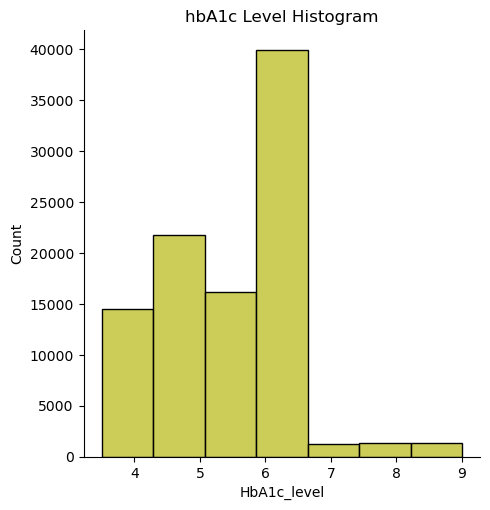

In [29]:
ax = sns.displot(data=df, x='HbA1c_level', color = sns.color_palette()[8], bins=7)
ax.set(title='hbA1c Level Histogram')

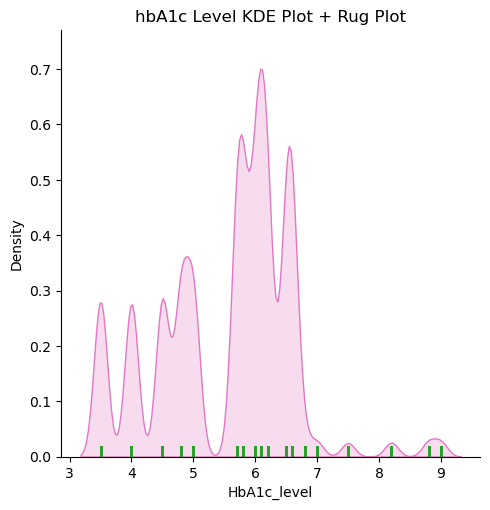

In [30]:
ax = sns.displot(data=df, x='HbA1c_level', color = sns.color_palette()[6], kind='kde', fill=True)
sns.rugplot(data=df, x='HbA1c_level', color = sns.color_palette()[2])
ax.set(title='hbA1c Level KDE Plot + Rug Plot')

In [31]:
df['HbA1c_level'].value_counts(normalize=True)*100

6.6    8.491253
5.7    8.449649
6.5    8.373723
5.8    8.312358
6.0    8.308198
6.2    8.276995
6.1    8.025295
3.5    7.612381
4.8    7.588459
4.5    7.582219
4.0    7.493811
5.0    7.441807
8.8    0.686456
8.2    0.685416
9.0    0.678135
7.5    0.667734
6.8    0.667734
7.0    0.658374
Name: HbA1c_level, dtype: float64

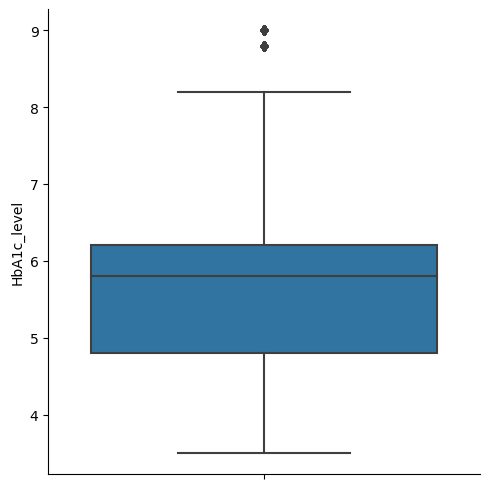

In [32]:
sns.catplot(kind='box', data=df, y='HbA1c_level')

#### Conclusions
- This value is not continuous 
- There are some outliers
- Most people fall in the range of 5 - 6.6 which is considred as healthy 

### Univariate Analysis on Blood Glucose Level Column

In [33]:
df['blood_glucose_level'].describe()

count    96146.000000
mean       138.218231
std         40.909771
min         80.000000
25%        100.000000
50%        140.000000
75%        159.000000
max        300.000000
Name: blood_glucose_level, dtype: float64

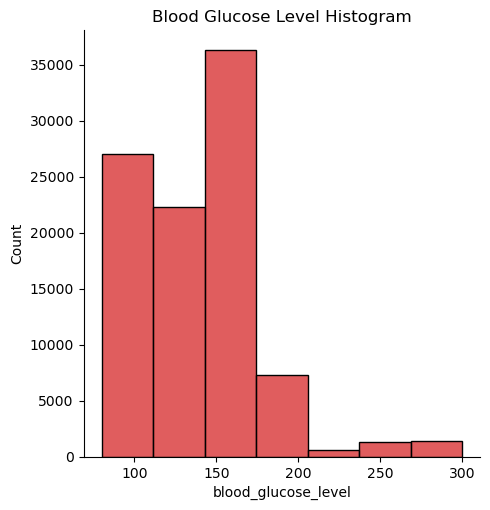

In [34]:
ax = sns.displot(data=df, x='blood_glucose_level', color = sns.color_palette()[3], bins=7)
ax.set(title='Blood Glucose Level Histogram')

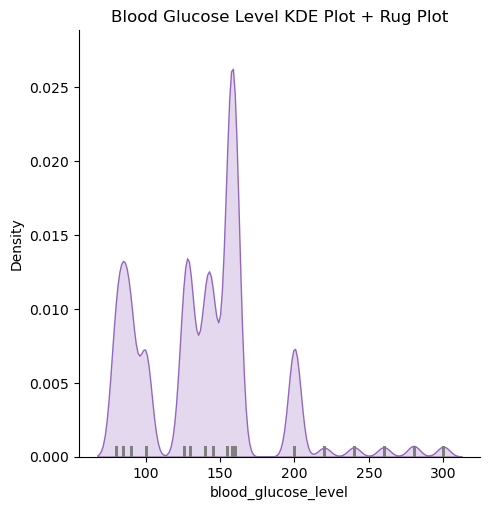

In [35]:
ax = sns.displot(data=df, x='blood_glucose_level', color = sns.color_palette()[4], kind='kde', fill=True)
sns.rugplot(data=df, x='blood_glucose_level', color = sns.color_palette()[7])
ax.set(title='Blood Glucose Level KDE Plot + Rug Plot')

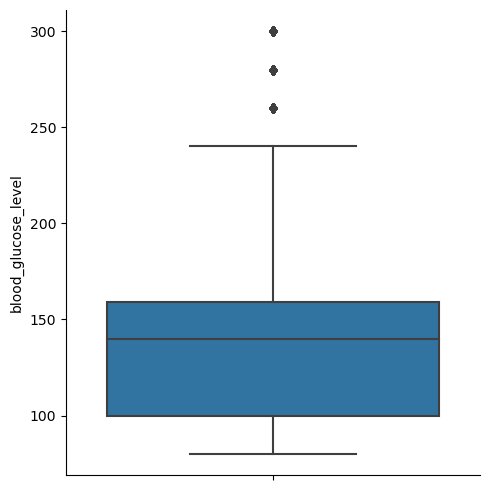

In [36]:
sns.catplot(kind='box', data=df, y='blood_glucose_level')

In [37]:
df['blood_glucose_level'].skew()

0.83648926055032

#### Conclusions 
- Positvely Skewed 
- Has Outliers
- 50% people fall in the 100 to 160 range

## Count Plots for Categorical Columns

[Text(0.5, 1.0, 'Count Plot of Gender')]

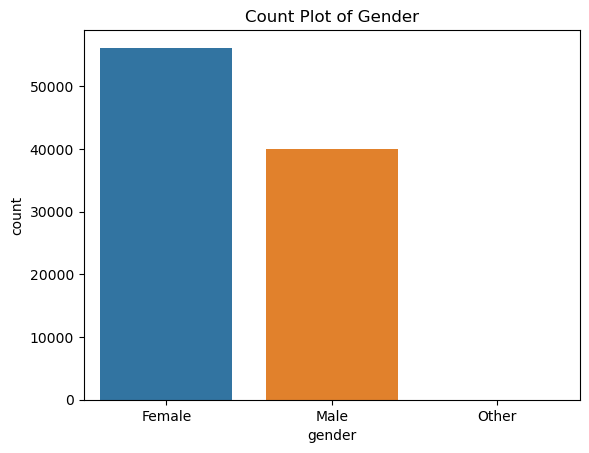

In [38]:
ax = sns.countplot(data=df, x='gender')
ax.set(title='Count Plot of Gender')

[Text(0, 0, 'No Hypertension'), Text(1, 0, 'Hypertension')]

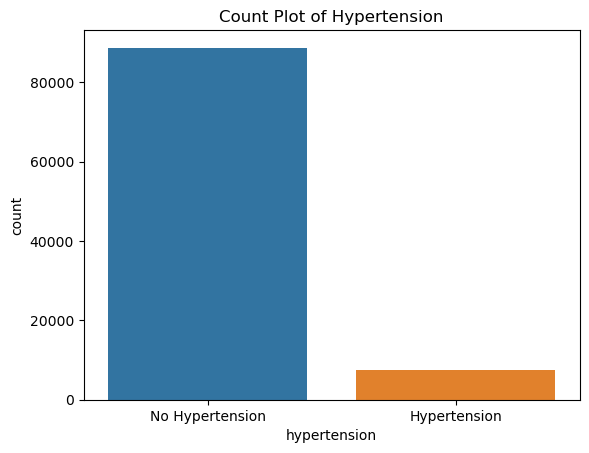

In [39]:
ax = sns.countplot(data=df, x='hypertension')
ax.set(title='Count Plot of Hypertension')
ax.set_xticklabels(['No Hypertension', 'Hypertension'])

[Text(0, 0, 'No Heart Disease'), Text(1, 0, 'Heart Disease')]

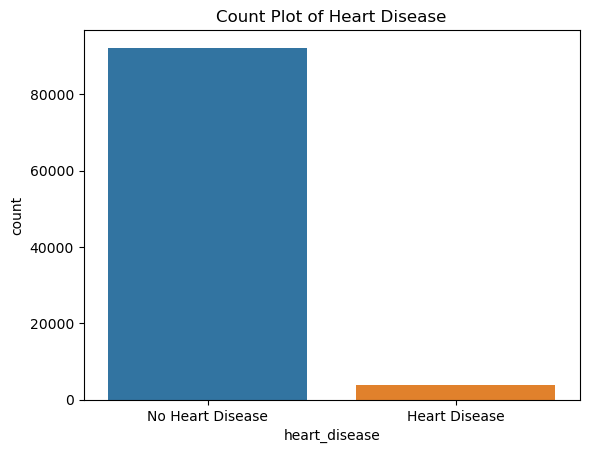

In [40]:
ax = sns.countplot(data=df, x='heart_disease')
ax.set(title='Count Plot of Heart Disease')
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])

[Text(0.5, 1.0, 'Count Plot of Smoking History')]

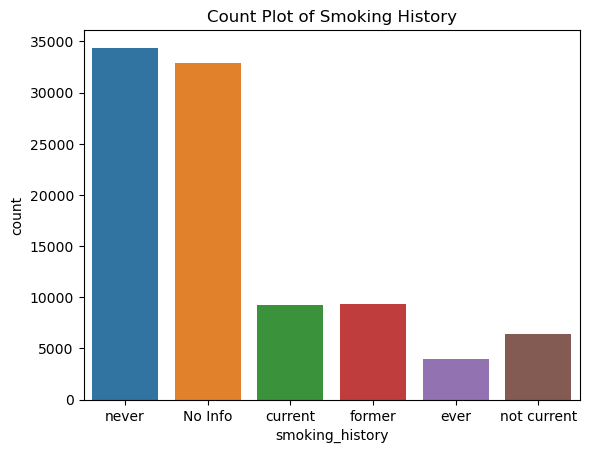

In [41]:
ax = sns.countplot(data=df, x='smoking_history')
ax.set(title='Count Plot of Smoking History')

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

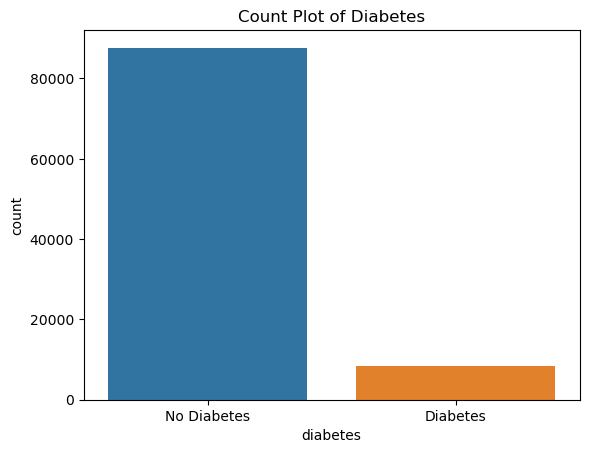

In [42]:
ax = sns.countplot(data=df, x='diabetes')
ax.set(title='Count Plot of Diabetes')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

## Bi-Variate Analysis

### Diabetes and Age column

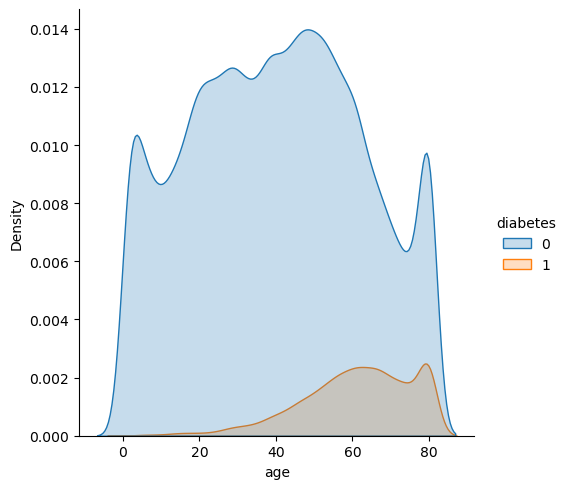

In [43]:
sns.displot(kind='kde', data=df, x='age', hue='diabetes', fill=True)

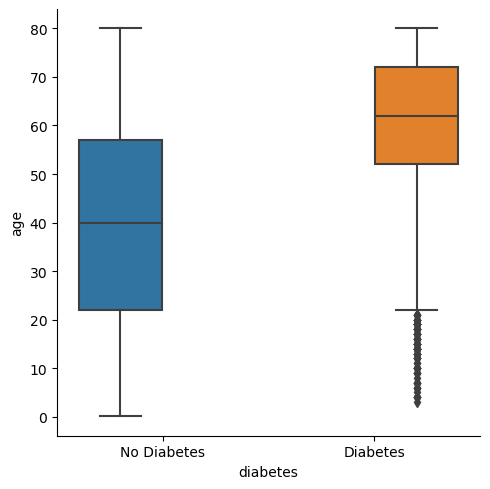

In [44]:
ax = sns.catplot(kind='box', data=df, x='diabetes', y='age',hue='diabetes')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

#### Conclusions
- Diabetes tends to affect older people generally
- It curve of diabetes tends to slowly rise when you hit 30s and the probability is maximum when you are aged around 60
- This tend to fit in well with the real world data 

### Diabetes and Gender column

In [45]:
temp_df = pd.crosstab(df['gender'], df['diabetes'], normalize='columns')*100

<Axes: xlabel='diabetes', ylabel='gender'>

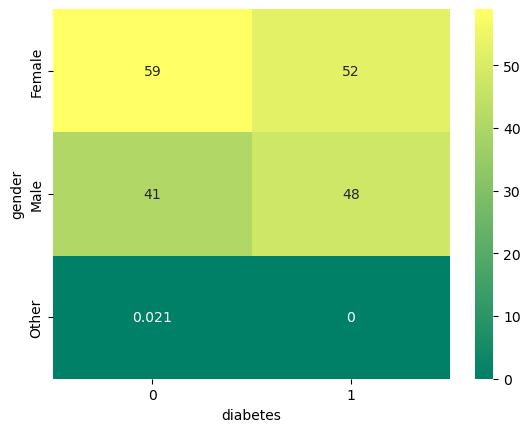

In [46]:
sns.heatmap(temp_df, annot=True, cmap='summer')

In [47]:
len(df[df['gender'] == 'Female'])

56161

In [48]:
len(df[df['gender'] == 'Male'])

39967

In [49]:
(58552 - 41430)/len(df)*100

17.808333159985853

#### Conclusion
- Diabetes affects both genders equally
- Here we 17% more female data, hence it is kind of biased

### Diabetes vs BMI column

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

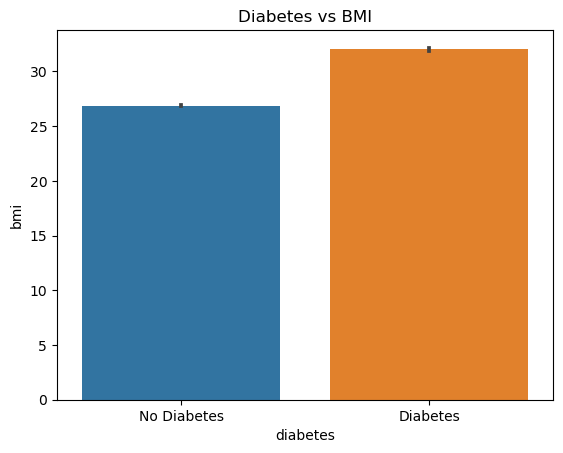

In [50]:
ax = sns.barplot(data=df, x='diabetes', y='bmi')
ax.set(title='Diabetes vs BMI')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

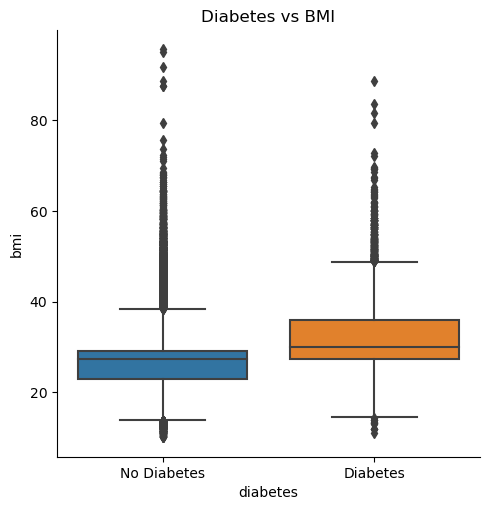

In [51]:
ax = sns.catplot(data=df, x='diabetes', y='bmi', kind='box')
ax.set(title='Diabetes vs BMI')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

#### Conclusions
- with increase in BMI, chance of diabetes increases 

### Diabetes vs HbA1c_level column

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

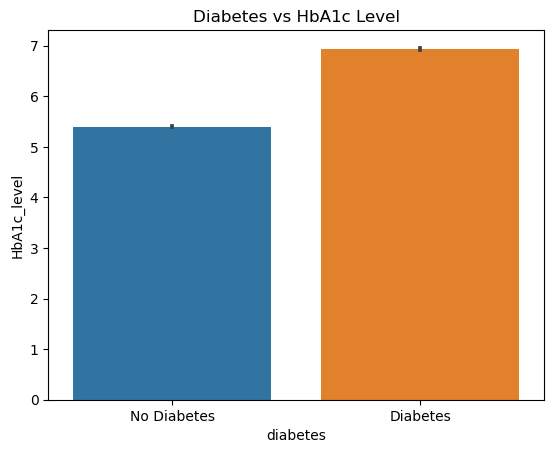

In [52]:
ax = sns.barplot(data=df, x='diabetes', y='HbA1c_level')
ax.set(title='Diabetes vs HbA1c Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

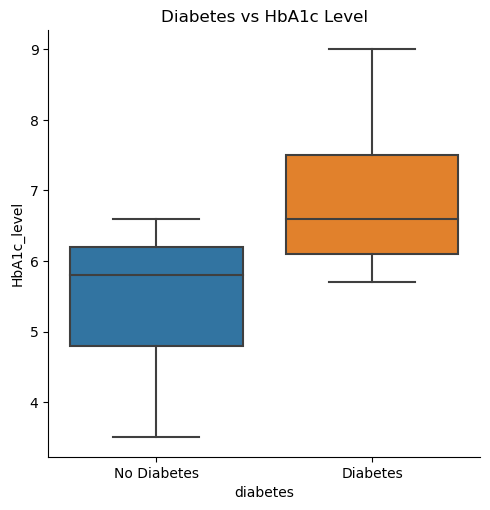

In [53]:
ax = sns.catplot(data=df, x='diabetes', y='HbA1c_level', kind='box')
ax.set(title='Diabetes vs HbA1c Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

#### Conclusion 
- with increase in HbA1c level, the chance of diabetes increases
- People who have diabetes have a median HbA1c value of around 6.7 

### Diabetes vs blood_glucose_level column

[Text(0, 0, 'No Diabetes'), Text(1, 0, 'Diabetes')]

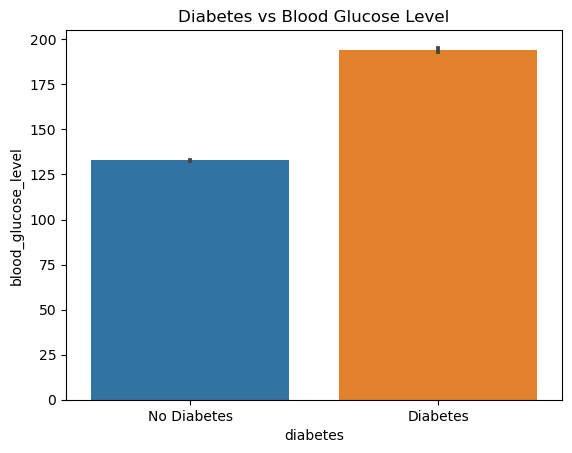

In [54]:
ax = sns.barplot(data=df, x='diabetes', y='blood_glucose_level')
ax.set(title='Diabetes vs Blood Glucose Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

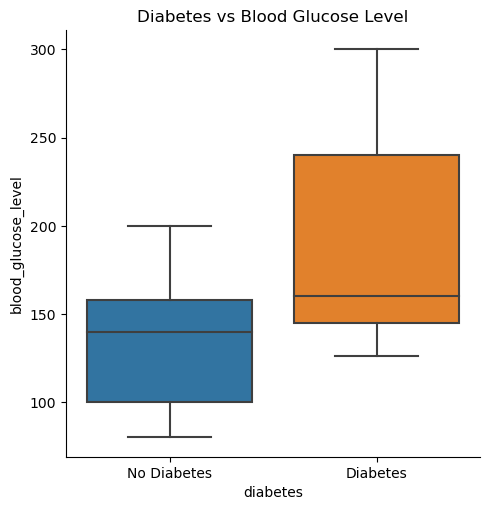

In [55]:
ax = sns.catplot(data=df, x='diabetes', y='blood_glucose_level', kind='box')
ax.set(title='Diabetes vs Blood Glucose Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

#### Conclusion
- with increase in blood glucose level, the chance of diabetes increases
- the people with diabetes have a blood glucose level of around 160 on average 

## Multi-variate analysis

### Diabetes - BMI - Age

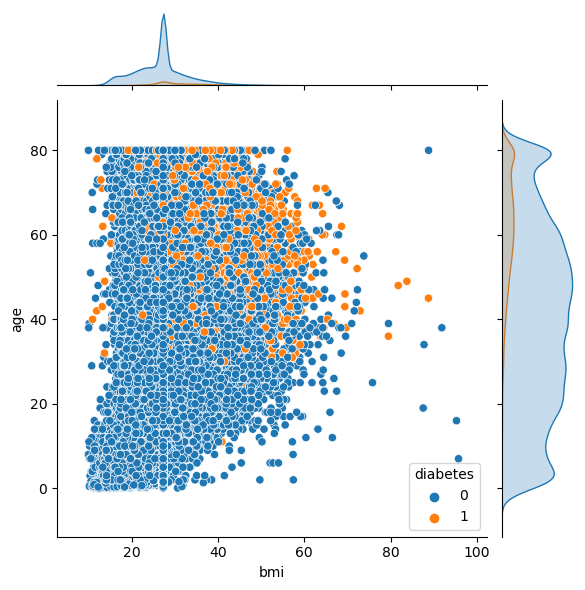

In [56]:
sns.jointplot(data=df, x='bmi', y='age', hue='diabetes', kind='scatter')

#### conclusions
- BMI increases as age increases, this maybe because as we grow older, we tend to neglect exercising regularly 
- we can see that older people who have more high BMI are more prone to diabetes 
- older people with healthy BMI are still doing fine

### Correlation Heatmap

In [57]:
df.corr(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257305,0.238451,0.344797,0.106719,0.114317,0.264927
hypertension,0.257305,1.000000,0.119982,0.148111,0.081441,0.084834,0.195710
heart_disease,0.238451,0.119982,1.000000,0.061376,0.068140,0.070832,0.170711
bmi,0.344797,0.148111,0.061376,1.000000,0.084423,0.092543,0.214932
HbA1c_level,0.106719,0.081441,0.068140,0.084423,1.000000,0.171615,0.406408
blood_glucose_level,0.114317,0.084834,0.070832,0.092543,0.171615,1.000000,0.424336
diabetes,0.264927,0.195710,0.170711,0.214932,0.406408,0.424336,1.000000


[Text(0.5, 1.0, 'Correlation Heatmap')]

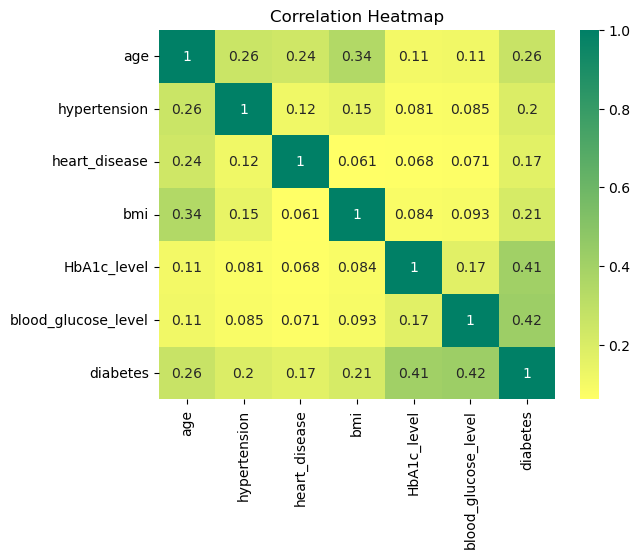

In [58]:
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='summer_r')
ax.set(title='Correlation Heatmap')

## END OF ANALYSIS 

- if you have any suggestions, please drop them in the comments 